In [1]:
#importing libraries
import os, pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats import chi2_contingency


In [2]:
#file set up/ getting work directories
cur_dir = os.getcwd()
cur_dir
file_name = 'People Analytics Data Science and Reporting - Case Study FINAL.xlsx'

#reading the data into a dataframe
df_activity = pd.read_excel(cur_dir + '/' + file_name, sheet_name = "Recruiting Activity Data",skiprows=[1],header=1)
df_activity
df_offer = pd.read_excel(cur_dir + '/' + file_name, sheet_name = "Offer Response Data")
df_offer


,Candidate ID Number,Offer Decision
0,3368,Offer Accepted
1,10008,Offer Accepted
2,2790,Offer Accepted
3,3500,Offer Accepted
4,2675,Offer Accepted
...,...,...
129,2510,Offer Response Pending
130,2480,Offer Response Pending
131,2556,Offer Response Pending
132,2501,Offer Response Pending


In [3]:
##Get highest Degree ever obtained 
#Assumption: JD is considered Masters, so they will be labled as Masters as well. 
degree_dict = {"PhD": 1, "Masters": 2,"JD":2, "Bachelors": 3}
# Create a new column called "Highest Degree Level"
def get_highest_degree_level(row):
    degree_levels = []
    for degree in ["Degree", "Degree.1", "Degree.2", "Degree.3"]:
        degree_value = row[degree]
        if not pd.isna(degree_value):
            degree_levels.append(degree_value)
    if not degree_levels:
        return None
    min_degree_value = min([degree_dict.get(degree_value, 4) for degree_value in degree_levels])
    min_degree_name = [degree_name for degree_name, degree_value in degree_dict.items() if degree_value == min_degree_value]
    if min_degree_name:
        return min_degree_name[0]
    else:
        return None

df_activity["Highest Degree Level"] = df_activity.apply(get_highest_degree_level, axis=1)

# Print the DataFrame
df_activity
# df[df['Candidate ID Number']==2601]
# df.to_csv(cur_dir+'output.csv', index=False)



,Candidate ID Number,Position Title,Department,Furthest Recruiting Stage Reached,Date of Application,Application Source,Years of Experience,Candidate Type,Degree,School,...,Degree.1,School.1,Major.1,Degree.2,School.2,Major.2,Degree.3,School.3,Major.3,Highest Degree Level
0,3668741,Associate Product Manager,Product,New Application,2016-11-17,Campus Event,0,Campus,Bachelors,NYU,...,Bachelors,UC Berkeley,Physics,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors
1,783317,Operations Coordinator,Operations,New Application,2017-12-22,Campus Job Board,0,Campus,Bachelors,Harvard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors
2,2046362,Business Operations Manager,Operations,New Application,2018-06-20,Agency,6,Experienced,Bachelors,Columbia,...,Masters,NYU,Computer Science,Masters,University of Washington,Mathematics,NaN,NaN,NaN,Masters
3,39321,System Engineer,Engineering,New Application,2018-09-04,Career Fair,0,Campus,Bachelors,University of Washington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors
4,222272,Operations Generalist,Operations,New Application,2018-11-08,Campus Job Board,2,Campus,PhD,NYU,...,Bachelors,Columbia,Statistics,NaN,NaN,NaN,NaN,NaN,NaN,PhD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7403,6166724,System Engineer,Engineering,Phone Screen,2018-08-13,Career Fair,1,Campus,PhD,Columbia,...,Bachelors,UC Berkeley,Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,PhD
7404,1718459,System Engineer,Engineering,In-House Interview,2016-10-01,Career Fair,0,Campus,Bachelors,MIT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors
7405,10008,System Engineer,Engineering,Offer Sent,2016-08-08,Campus Event,0,Campus,Bachelors,Harvard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors
7406,4432109,Operations Coordinator,Operations,New Application,2016-10-13,Campus Job Board,2,Campus,Bachelors,University of Texas,...,PhD,MIT,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,PhD


In [4]:
#get associated highest degree's School and Major.
def get_associated_school_major(row):
    degree_fields = ["Degree", "Degree.1", "Degree.2", "Degree.3"]
    school_fields = ["School", "School.1", "School.2", "School.3"]
    major_fields = ["Major", "Major.1", "Major.2", "Major.3"]

    highest_degree_level = row["Highest Degree Level"]

    for degree, school, major in zip(degree_fields, school_fields, major_fields):
        degree_value = row[degree]
        if degree_value == highest_degree_level or degree_value == "JD":
            return row[school], row[major]

    return None, None

# df = df_activity
df_activity[["Associated School", "Associated Major"]] = df_activity.apply(get_associated_school_major, axis=1, result_type="expand")


df_activity
# df[df['Candidate ID Number']==2601]
# df.to_csv(cur_dir+'output.csv', index=False)



,Candidate ID Number,Position Title,Department,Furthest Recruiting Stage Reached,Date of Application,Application Source,Years of Experience,Candidate Type,Degree,School,...,Major.1,Degree.2,School.2,Major.2,Degree.3,School.3,Major.3,Highest Degree Level,Associated School,Associated Major
0,3668741,Associate Product Manager,Product,New Application,2016-11-17,Campus Event,0,Campus,Bachelors,NYU,...,Physics,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors,NYU,Computer Science
1,783317,Operations Coordinator,Operations,New Application,2017-12-22,Campus Job Board,0,Campus,Bachelors,Harvard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors,Harvard,Political Science
2,2046362,Business Operations Manager,Operations,New Application,2018-06-20,Agency,6,Experienced,Bachelors,Columbia,...,Computer Science,Masters,University of Washington,Mathematics,NaN,NaN,NaN,Masters,NYU,Computer Science
3,39321,System Engineer,Engineering,New Application,2018-09-04,Career Fair,0,Campus,Bachelors,University of Washington,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors,University of Washington,Computer Science
4,222272,Operations Generalist,Operations,New Application,2018-11-08,Campus Job Board,2,Campus,PhD,NYU,...,Statistics,NaN,NaN,NaN,NaN,NaN,NaN,PhD,NYU,Physics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7403,6166724,System Engineer,Engineering,Phone Screen,2018-08-13,Career Fair,1,Campus,PhD,Columbia,...,Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,PhD,Columbia,Statistics
7404,1718459,System Engineer,Engineering,In-House Interview,2016-10-01,Career Fair,0,Campus,Bachelors,MIT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors,MIT,Computer Science
7405,10008,System Engineer,Engineering,Offer Sent,2016-08-08,Campus Event,0,Campus,Bachelors,Harvard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors,Harvard,Computer Science
7406,4432109,Operations Coordinator,Operations,New Application,2016-10-13,Campus Job Board,2,Campus,Bachelors,University of Texas,...,Computer Science,NaN,NaN,NaN,NaN,NaN,NaN,PhD,MIT,Computer Science


In [5]:
df = pd.merge(df_activity, df_offer, on='Candidate ID Number', how='left')


In [6]:
mask = (df['Furthest Recruiting Stage Reached'] == 'Offer Sent') & (df['Offer Decision'] == 'Offer Accepted')
df.loc[mask, 'Furthest Recruiting Stage Reached'] = 'Offer Accepted'


In [7]:
# df.to_csv(cur_dir+'output.csv', index=False)
# df

In [8]:
# Define the order of the stages
stage_order = ['new application', 'phone screen', 'in-house interview', 'offer sent', 'offer accepted']

# Create a new list to store the recruiting funnel view
funnel_data = []

# Normalize the 'Furthest Recruiting Stage Reached' column to lower case and remove any leading or trailing spaces
df_tmp = df.copy(deep=True)
df_tmp['Furthest Recruiting Stage Reached'] = df_tmp['Furthest Recruiting Stage Reached'].str.lower().str.strip()

# Create a categorical type for stages with a specified order
df_tmp['Furthest Recruiting Stage Reached'] = pd.Categorical(df_tmp['Furthest Recruiting Stage Reached'], categories=stage_order, ordered=True)

# Group the dataframe by Department and Highest Degree Level
grouped_df = df_tmp.groupby(["Department", "Highest Degree Level"])

# Iterate over each group and calculate the funnel view
for group, data in grouped_df:
    department, degree_level = group
    
    # Find the application that reached the furthest recruiting stage for each candidate
    furthest_stage = data.groupby("Candidate ID Number")["Furthest Recruiting Stage Reached"].max()
    
    # Count the unique candidates who reached each recruiting stage
    funnel_data_group = furthest_stage.value_counts().sort_index().reset_index()
    funnel_data_group.columns = ["Stage", "Applicants"]
    
    # Update the count of "Offer Sent" applicants to include the count of "Offer Accepted" applicants
    if "offer accepted" in funnel_data_group["Stage"].values:
        offer_accepted_count = funnel_data_group.loc[funnel_data_group["Stage"] == "offer accepted", "Applicants"].values[0]
        funnel_data_group.loc[funnel_data_group["Stage"] == "offer sent", "Applicants"] += offer_accepted_count
    
    # Calculate the conversion rate
    funnel_data_group["Conversion Rate"] = (funnel_data_group["Applicants"].div(funnel_data_group["Applicants"].shift()) * 100)
    
    # Set the conversion rate of 'new application' as 'NA'
    funnel_data_group.loc[funnel_data_group["Stage"] == "new application", "Conversion Rate"] = np.nan
    
    # Append the department and degree level to the funnel data
    funnel_data_group["Department"] = department
    funnel_data_group["Highest_degree_level"] = degree_level
    
    # Append the funnel data to the main funnel data list
    funnel_data.append(funnel_data_group)

# Concatenate all the funnel data into a single dataframe
funnel_df = pd.concat(funnel_data, ignore_index=True)

# Sort the funnel dataframe by Department, Highest Degree Level, and Stage
funnel_df.sort_values(["Department", "Highest_degree_level", "Stage"], inplace=True)

# Fill NA conversion rate with "NA" string
funnel_df["Conversion Rate"] = funnel_df["Conversion Rate"].fillna("NA")

# Changing stage names back to title case for final output
funnel_df['Stage'] = funnel_df['Stage'].str.title()
funnel_df = funnel_df[["Department", "Highest_degree_level", "Stage", "Applicants", "Conversion Rate"]]



funnel_df


,Department,Highest_degree_level,Stage,Applicants,Conversion Rate
0,Engineering,Bachelors,New Application,1129,NA
1,Engineering,Bachelors,Phone Screen,144,12.75465
2,Engineering,Bachelors,In-House Interview,86,59.722222
3,Engineering,Bachelors,Offer Sent,33,38.372093
4,Engineering,Bachelors,Offer Accepted,18,54.545455
...,...,...,...,...,...
85,Sales,PhD,New Application,82,NA
86,Sales,PhD,Phone Screen,19,23.170732
87,Sales,PhD,In-House Interview,13,68.421053
88,Sales,PhD,Offer Sent,1,7.692308


In [9]:
funnel_df.to_csv(cur_dir+'/output_fun.csv', index=False)

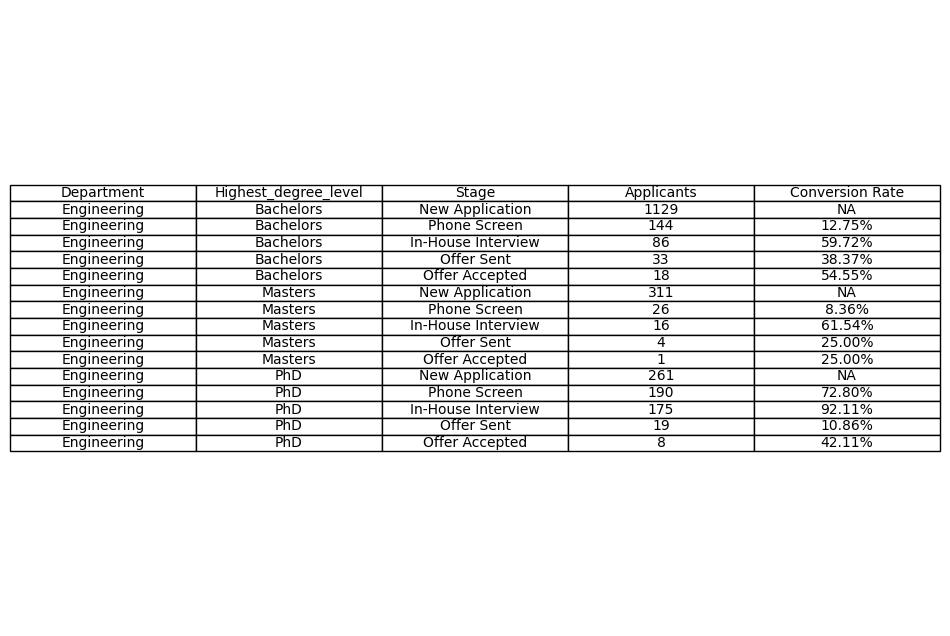

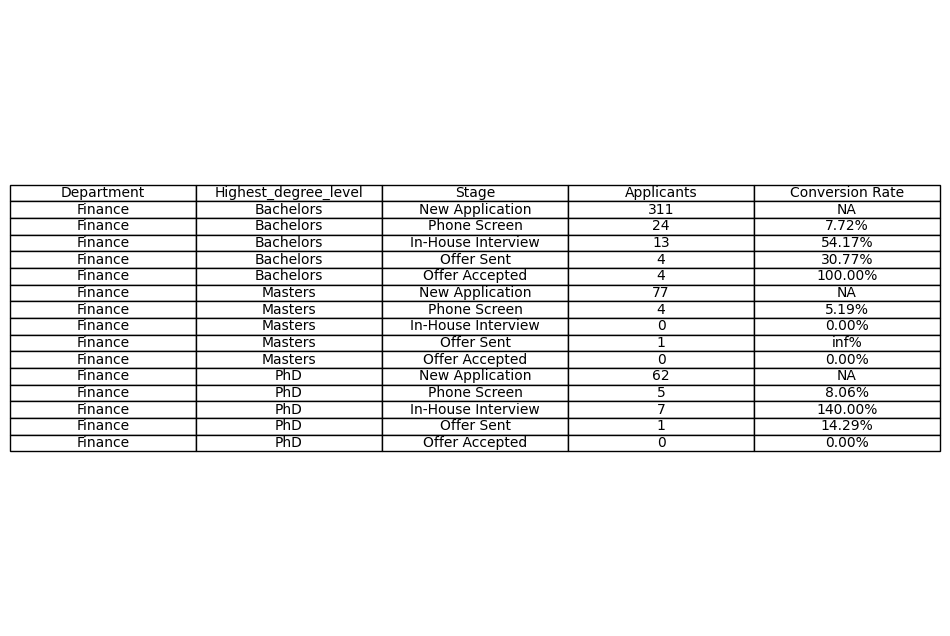

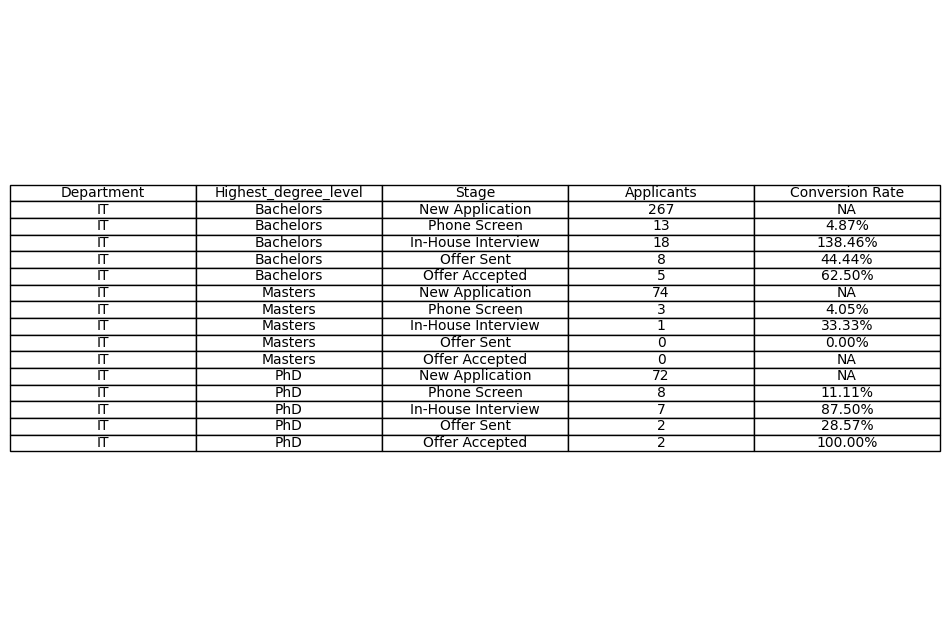

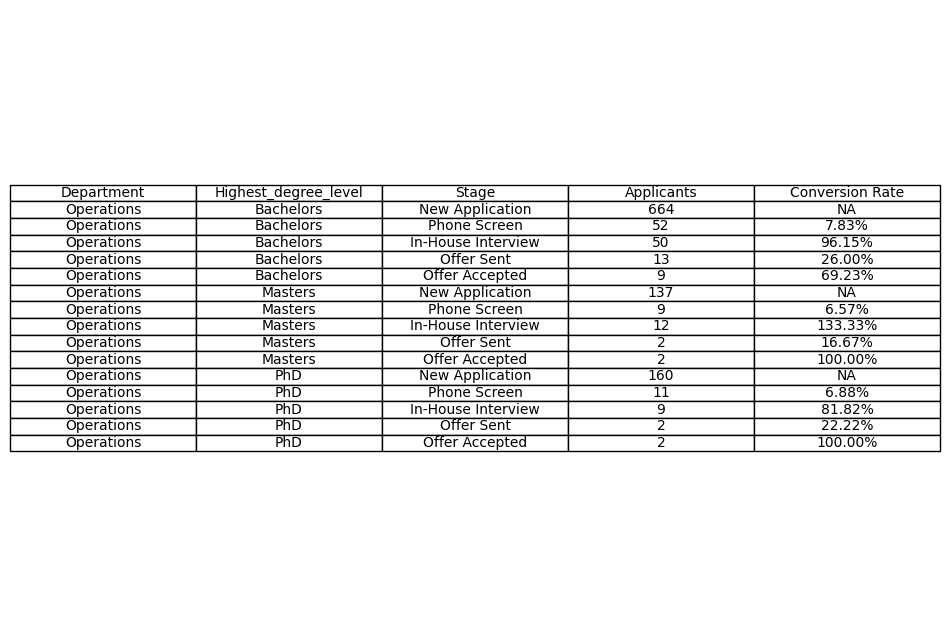

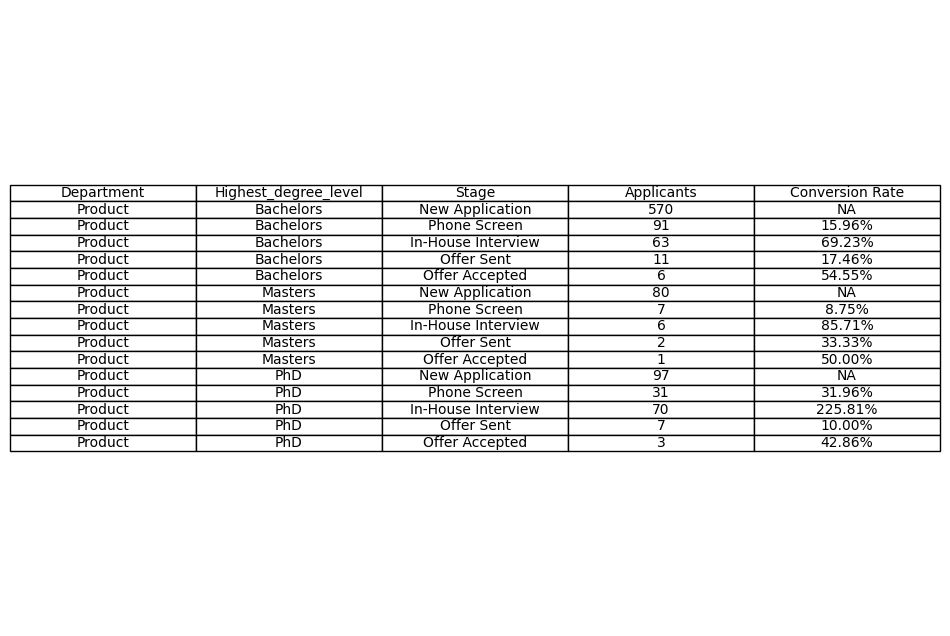

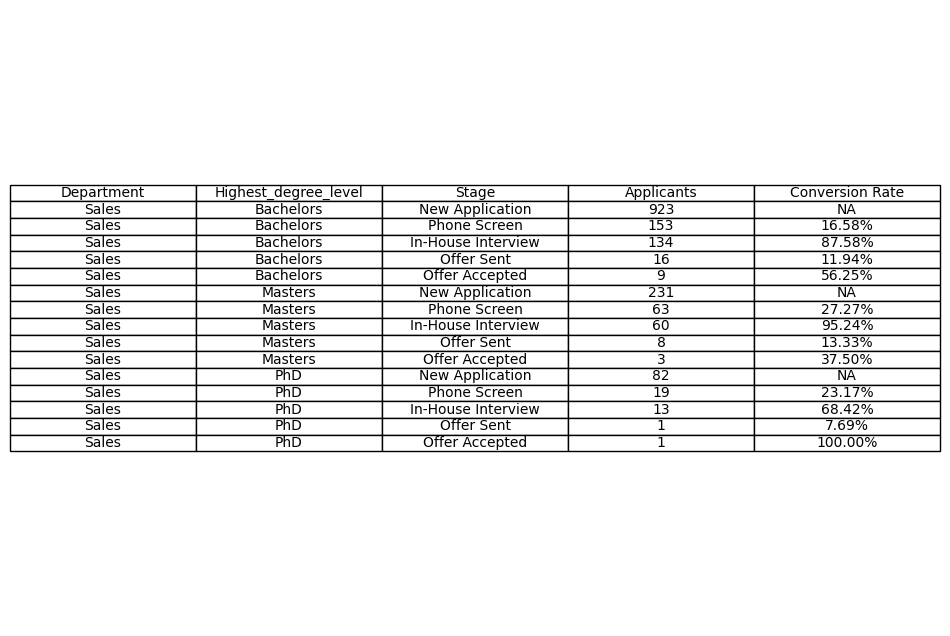

In [10]:
def format_conversion_rate(val):
    try:
        val = float(val)
        return f'{val:.2f}%'
    except ValueError:
        return val

# Apply function to Conversion Rate column
funnel_df['Conversion Rate'] = funnel_df['Conversion Rate'].apply(format_conversion_rate)

# Split the data by department
grouped = funnel_df.groupby('Department')

for name, group in grouped:
    fig, ax = plt.subplots(figsize=(12,8))
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=group.values, colLabels=group.columns, cellLoc='center', loc='center')

    pp = PdfPages(f"{name}.pdf")
    pp.savefig(fig, bbox_inches='tight')
    pp.close()

In [11]:
#Q2

# Step 1: Filter the dataframe
df_stats = df.copy(deep=True)


# Step 2: Preprocess the data
df_stats['Furthest Recruiting Stage Reached'] = df_stats['Furthest Recruiting Stage Reached'].str.lower()

# Step 3: Filter to relevant candidates
filtered_data = df_stats[df_stats['Furthest Recruiting Stage Reached'].isin(['in-house interview', 'offer sent', 'offer accepted', 'phone screen','new application'])]
filtered_data = filtered_data[filtered_data['Application Source'].isin(['Career Fair', 'Campus Event'])]

# Step 4: Calculate the in-house interview rates for each year
filtered_data['Year'] = pd.to_datetime(filtered_data['Date of Application']).dt.year
filtered_data['In-House'] = filtered_data['Furthest Recruiting Stage Reached'] == 'in-house interview'
filtered_data
# Step 5: Perform pairwise chi-squared tests and identify statistically significant differences
results = []
years = filtered_data['Year'].unique()

for i in range(len(years)):
    for j in range(i + 1, len(years)):
        year1_inhouse = filtered_data[(filtered_data['Year'] == years[i]) & filtered_data['In-House']].shape[0]
        year1_tot = filtered_data[(filtered_data['Year'] == years[i]) ].shape[0]
        year2_inhouse = filtered_data[(filtered_data['Year'] == years[j]) & filtered_data['In-House']].shape[0]
        year2_tot = filtered_data[(filtered_data['Year'] == years[j]) ].shape[0]
        
        contingency_table = pd.DataFrame(
            [[year1_inhouse, year1_tot],
             [year2_inhouse, year2_tot]],
            columns=['In-House', 'All Applicants'],
            index=[years[i], years[j]]
        )
        
        _, p_value, _, _ = chi2_contingency(contingency_table)
        results.append((years[i], years[j], p_value))

# Print results
results.sort(key=lambda x: x[2])
for result in results:
    year1, year2, p_value = result
    significance = 'Significant' if p_value < 0.05 else 'Not Significant'
    print(f"Comparison between {year1} and {year2}: p-value = {p_value:.4f} ({significance})")

Comparison between 2018 and 2017: p-value = 0.0180 (Significant)
Comparison between 2016 and 2018: p-value = 0.0905 (Not Significant)
Comparison between 2016 and 2017: p-value = 0.5850 (Not Significant)


In [14]:
#Q3 data prep


df_vis = df.copy(deep=True)

# Normalize the stages to lower case
df_vis['Furthest Recruiting Stage Reached'] = df_vis['Furthest Recruiting Stage Reached'].str.lower()

# Define the stages that involve human effort and bot stage
human_effort_stages = ['phone screen', 'in-house interview', 'offer sent', 'offer accepted']
bot_stage = ['new application']
team_effort_stages = ['in-house interview', 'offer sent', 'offer accepted']

# Add columns to mark if the furthest stage involves human effort, bot stage, team effort stage, and if offer is accepted
df_vis['Human_Effort_Involved'] = df_vis['Furthest Recruiting Stage Reached'].isin(human_effort_stages)
df_vis['Bot_Stage'] = df_vis['Furthest Recruiting Stage Reached'].isin(bot_stage)
df_vis['Team_Effort_Involved'] = df_vis['Furthest Recruiting Stage Reached'].isin(team_effort_stages)
df_vis['Offer_Accepted'] = (df_vis['Furthest Recruiting Stage Reached'] == 'offer accepted').astype(int)

# Calculate the metrics for each Application Source
grouped = df_vis.groupby('Application Source').agg(
    Total_Applicants=('Candidate ID Number', 'count'),
    Bot_Filtered=('Bot_Stage', 'sum'),
    Total_Candidates_Human_Effort=('Human_Effort_Involved', 'sum'),
    Team_Effort_Candidates=('Team_Effort_Involved', 'sum'),
    Accepted_Offers=('Offer_Accepted', 'sum')
).reset_index()

# Calculate effectiveness
grouped['Bot_Screen_rate'] = grouped['Bot_Filtered'] / grouped['Total_Applicants']
grouped['HR_Screen_rate'] = (grouped['Total_Candidates_Human_Effort']-grouped['Team_Effort_Candidates']) / grouped['Total_Candidates_Human_Effort']
grouped['Team_Effectiveness'] = grouped['Accepted_Offers'] / grouped['Team_Effort_Candidates']
grouped['Overall_Effectiveness'] = grouped['Accepted_Offers'] / grouped['Total_Candidates_Human_Effort']


grouped
grouped.to_csv(cur_dir +'/application_source_effectiveness.csv', index=False)


,Application Source,Total_Applicants,Bot_Filtered,Total_Candidates_Human_Effort,Team_Effort_Candidates,Accepted_Offers,Bot_Screen_rate,HR_Screen_rate,Team_Effectiveness,Overall_Effectiveness
0,Advertisement,765,606,159,78,7,0.792157,0.509434,0.089744,0.044025
1,Agency,396,268,128,72,12,0.676768,0.437500,0.166667,0.093750
2,Campus Event,939,622,317,182,17,0.662407,0.425868,0.093407,0.053628
3,Campus Job Board,2616,2105,511,243,11,0.804664,0.524462,0.045267,0.021526
4,Career Fair,1550,1211,339,149,14,0.781290,0.560472,0.093960,0.041298
5,Internal Referral,74,44,30,15,0,0.594595,0.500000,0.000000,0.000000
6,Outsourced,162,124,38,24,4,0.765432,0.368421,0.166667,0.105263
7,Website,906,659,247,120,9,0.727373,0.514170,0.075000,0.036437
